---
# Visualize Class Data
- Show histograms for each input per class to get a picture of the distributions
- Depends on seaborn, matplotlib, pandas

In [1]:
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from random import shuffle

---
## Read Into DF

In [2]:
df = pd.read_csv("./clean_data/fully_merged_data.csv")
df = df.dropna()

# remove null values
arr = df.index[df["fel_misd"] == ' ']
df = df.drop(arr, axis=0)
arr = df.index[df["fel_misd"] == '\xa0']
df = df.drop(arr, axis=0)

from scipy.stats import zscore

need_norm = ["age","MEDHINC_CY", "WLTHINDXCY", "TOTHH_CY"]
norm = df[need_norm].apply(zscore)

arr = []
for c in df['fel_misd'].value_counts().index:
    a = df.index[(df['fel_misd'] == c) & (df['sex'] == 'U')]
    df = df.drop(a)
    
        

df[need_norm] = norm

---
## Generate Histograms

In [3]:
df[df['fel_misd']=='M']['sex'].value_counts()

M    34125
F    12674
Name: sex, dtype: int64

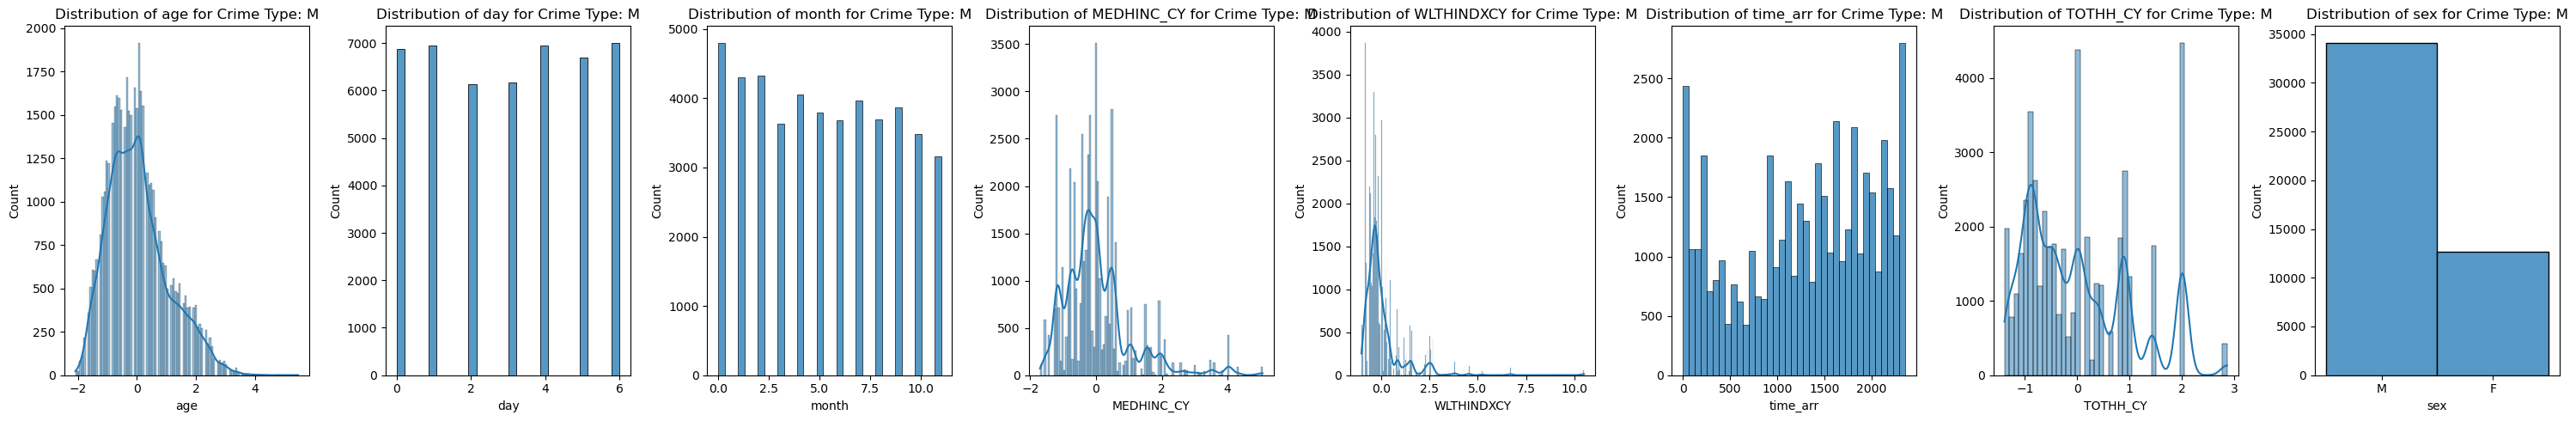

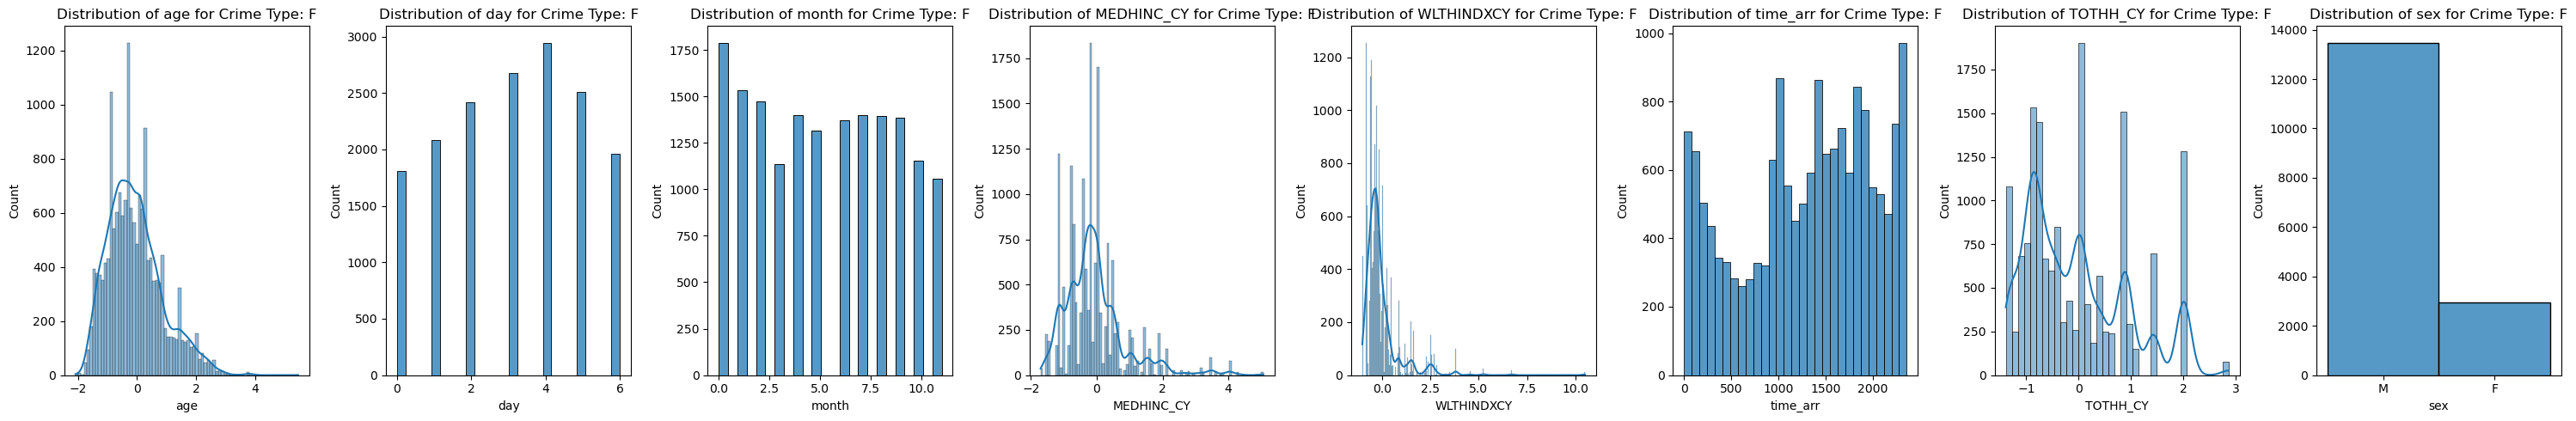

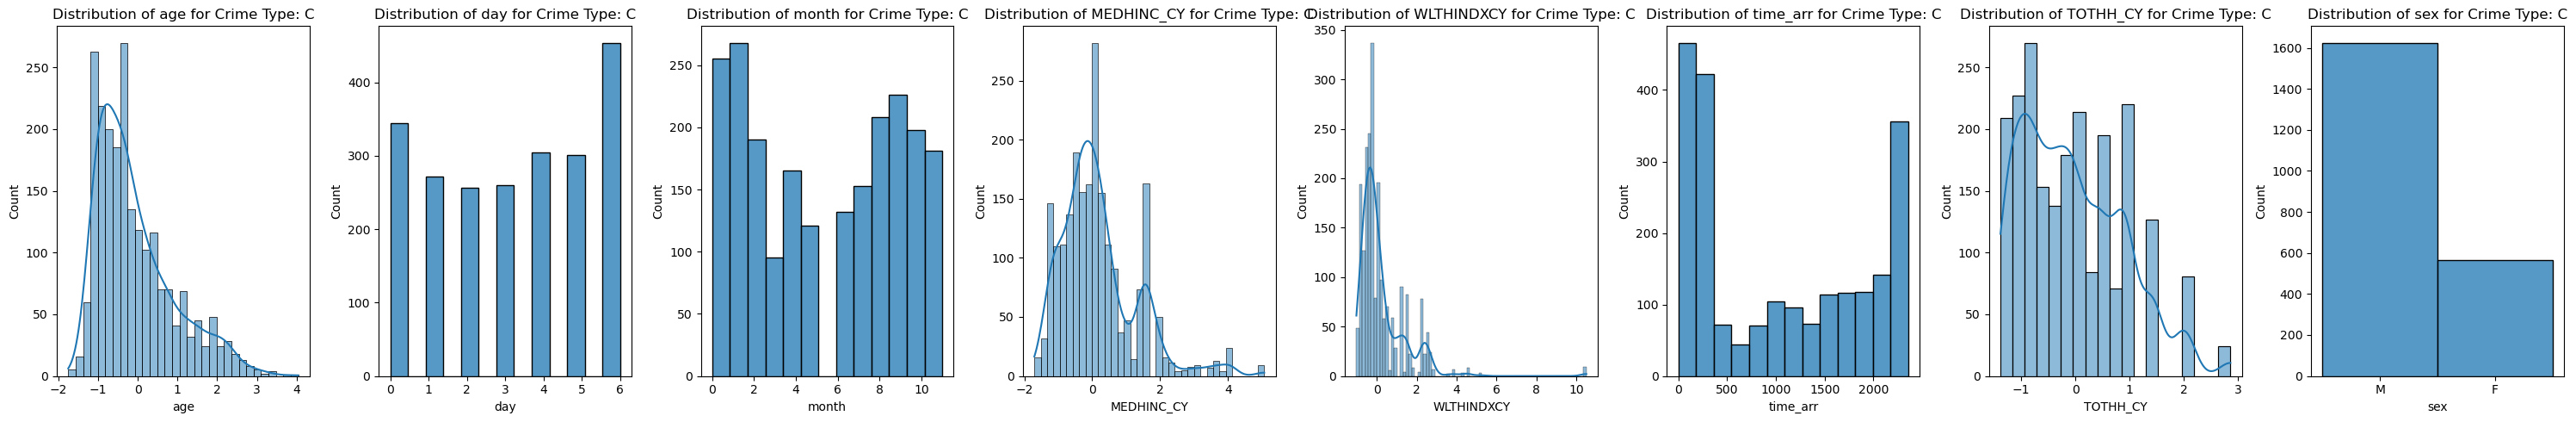

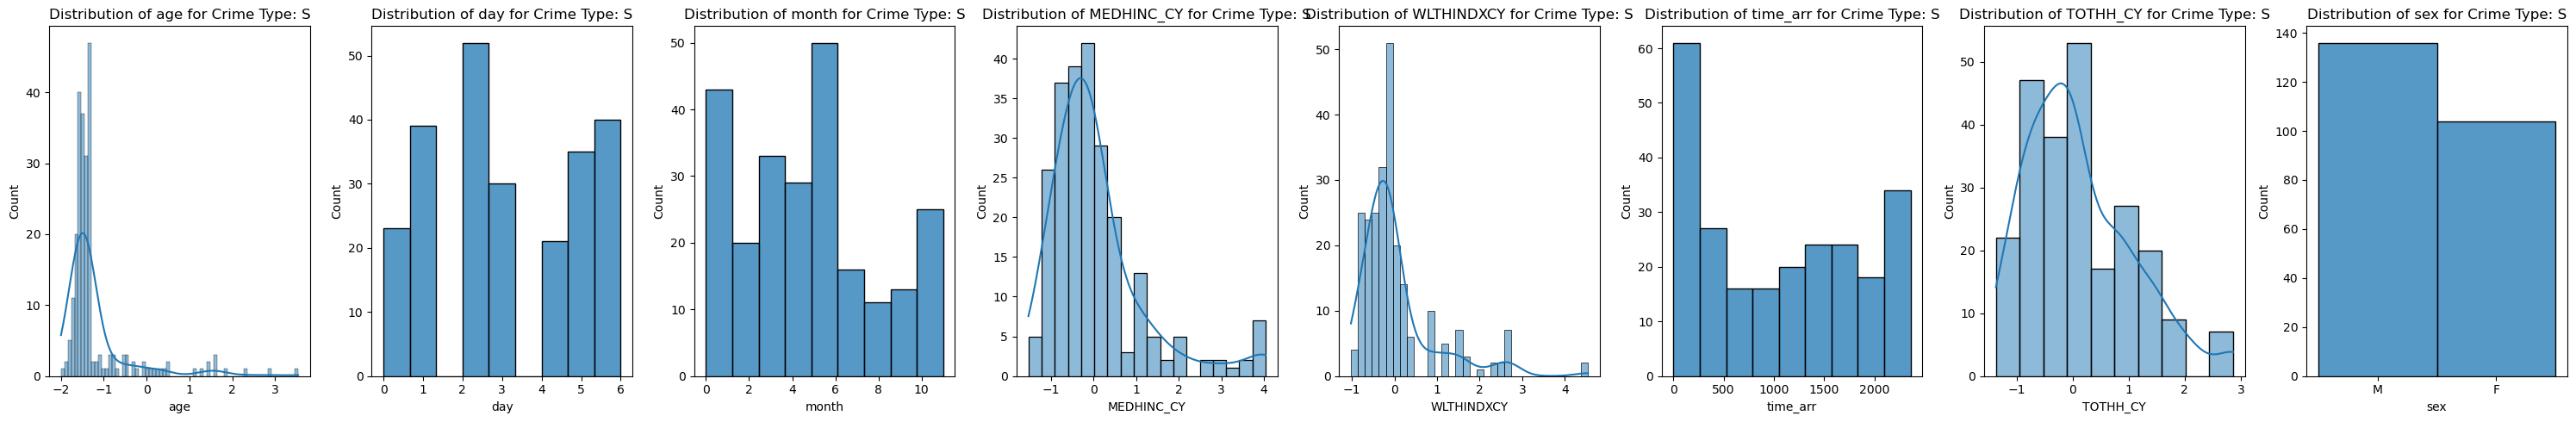

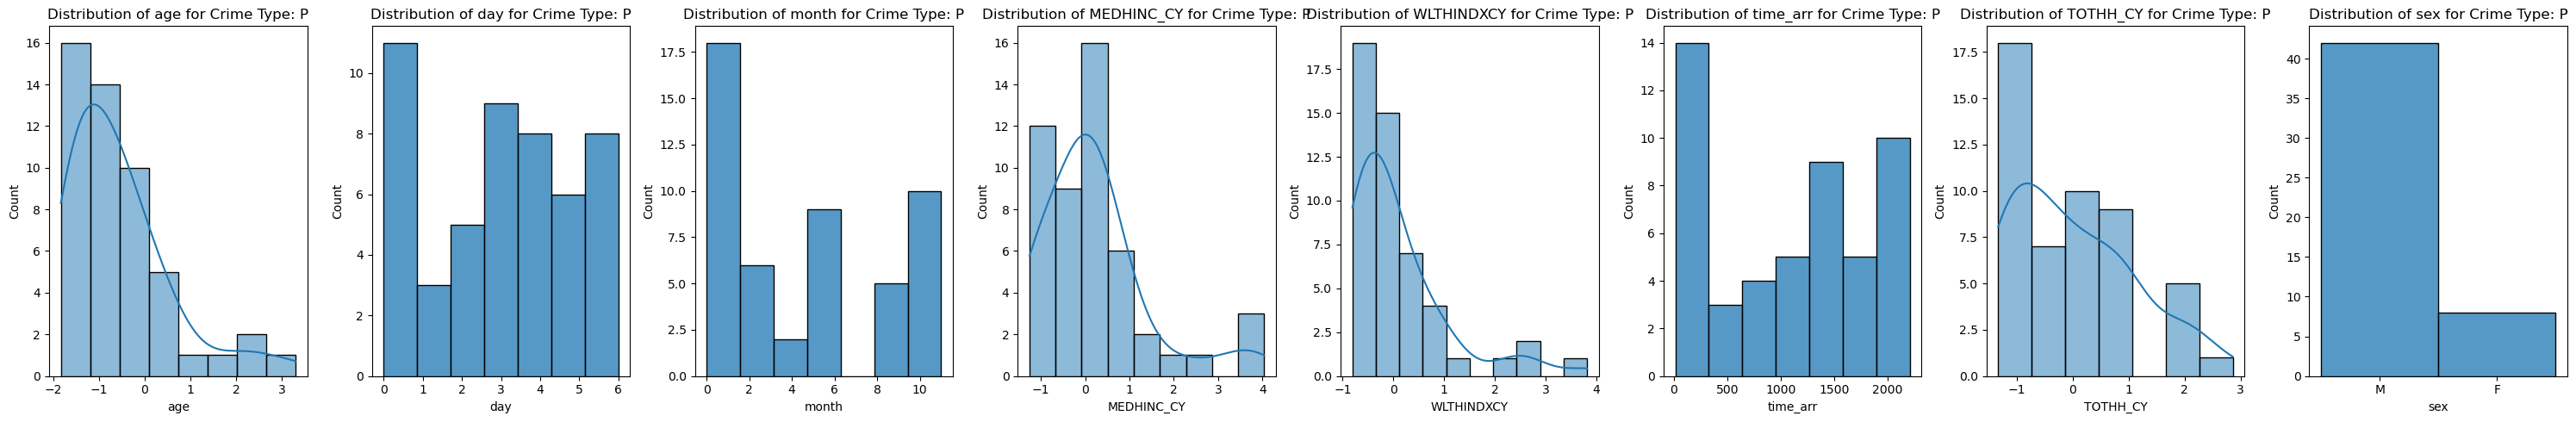

In [4]:
unique_crime_types = df['fel_misd'].value_counts().index

for crime_type in unique_crime_types:
    filtered_df = df[df['fel_misd'] == crime_type]
    
    num_cols = len(filtered_df.columns) - 1
    fig, axes = plt.subplots(nrows=1,ncols=num_cols, figsize=(30,5))
    
    for i, col in enumerate(filtered_df.columns):
        if col != 'fel_misd':
            b = col in need_norm
            ax = axes[i-1]
            sb.histplot(filtered_df[col], ax=ax,kde=b)
            ax.set_title(f'Distribution of {col} for Crime Type: {crime_type}')
    
    plt.tight_layout()
    plt.show()